In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [4]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
df.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [6]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df["SOP"].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [9]:
df.rename(columns ={'Serial No.':'Srno', 'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'UniversityRating','Chance of Admit':'ChanceofAdmit'}, inplace = True)

In [10]:
df

,Srno,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [11]:
df.isnull().sum()

Srno                0
GRE                 0
TOEFL               0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
Chance of Admit     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2c8cc95d100>,
 'caps': [<matplotlib.lines.Line2D at 0x2c8cc95d760>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c8cc943df0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c8cc95dc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c8cc95df10>],
 'means': []}

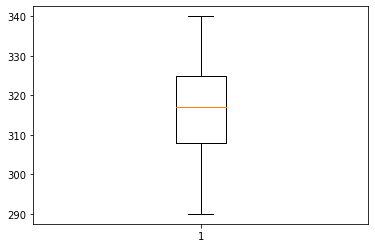

In [12]:
plt.boxplot(list(df.GRE))

array([[<AxesSubplot:title={'center':'Srno'}>,
        <AxesSubplot:title={'center':'GRE'}>,
        <AxesSubplot:title={'center':'TOEFL'}>],
       [<AxesSubplot:title={'center':'UniversityRating'}>,
        <AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>],
       [<AxesSubplot:title={'center':'CGPA'}>,
        <AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>]], dtype=object)

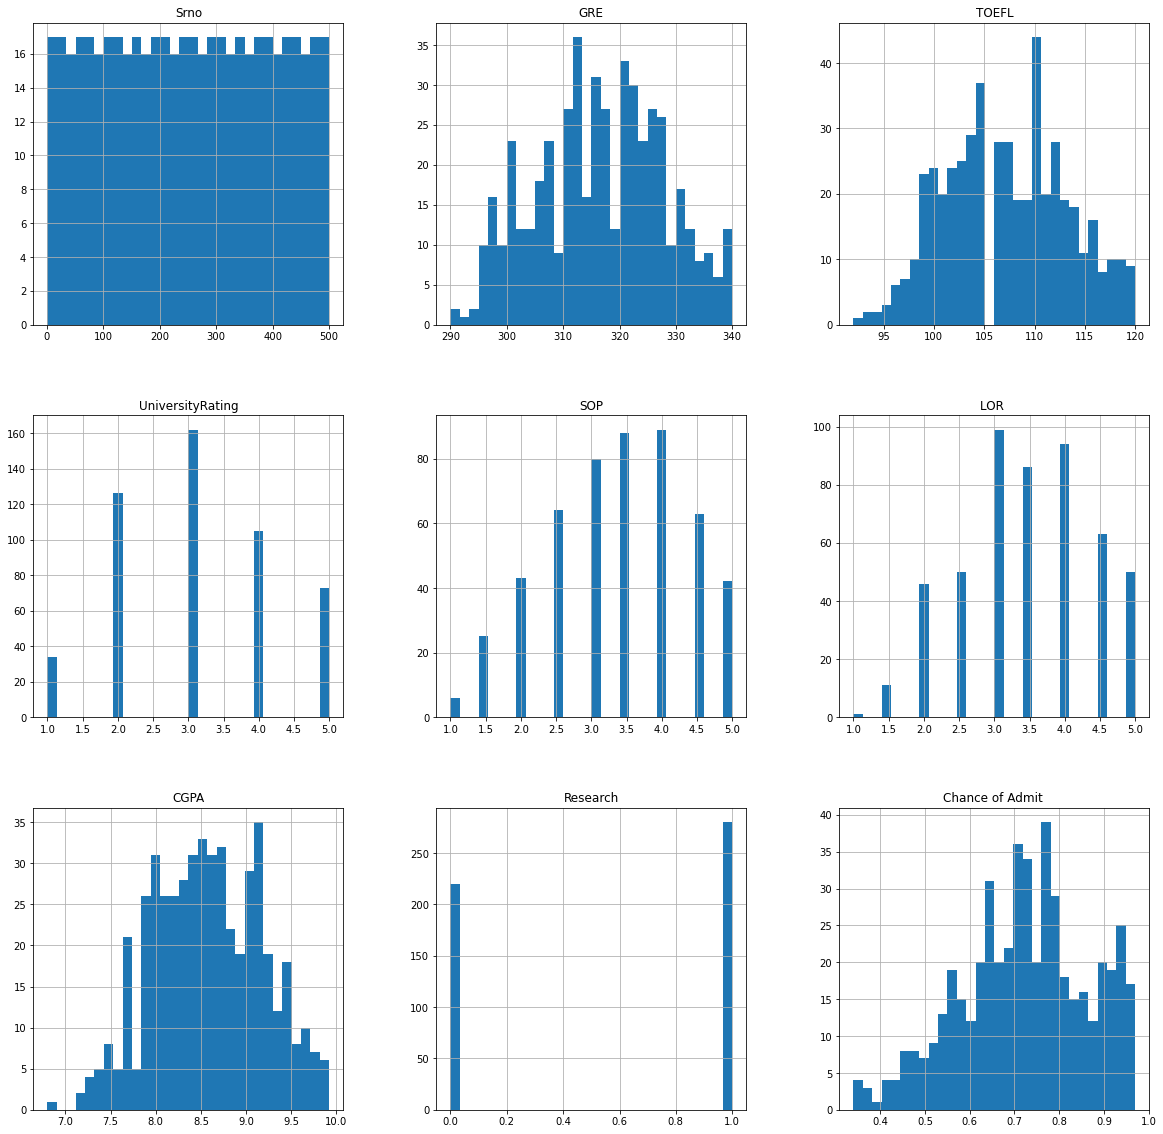

In [68]:
df.hist(bins=30, figsize=(20,20))

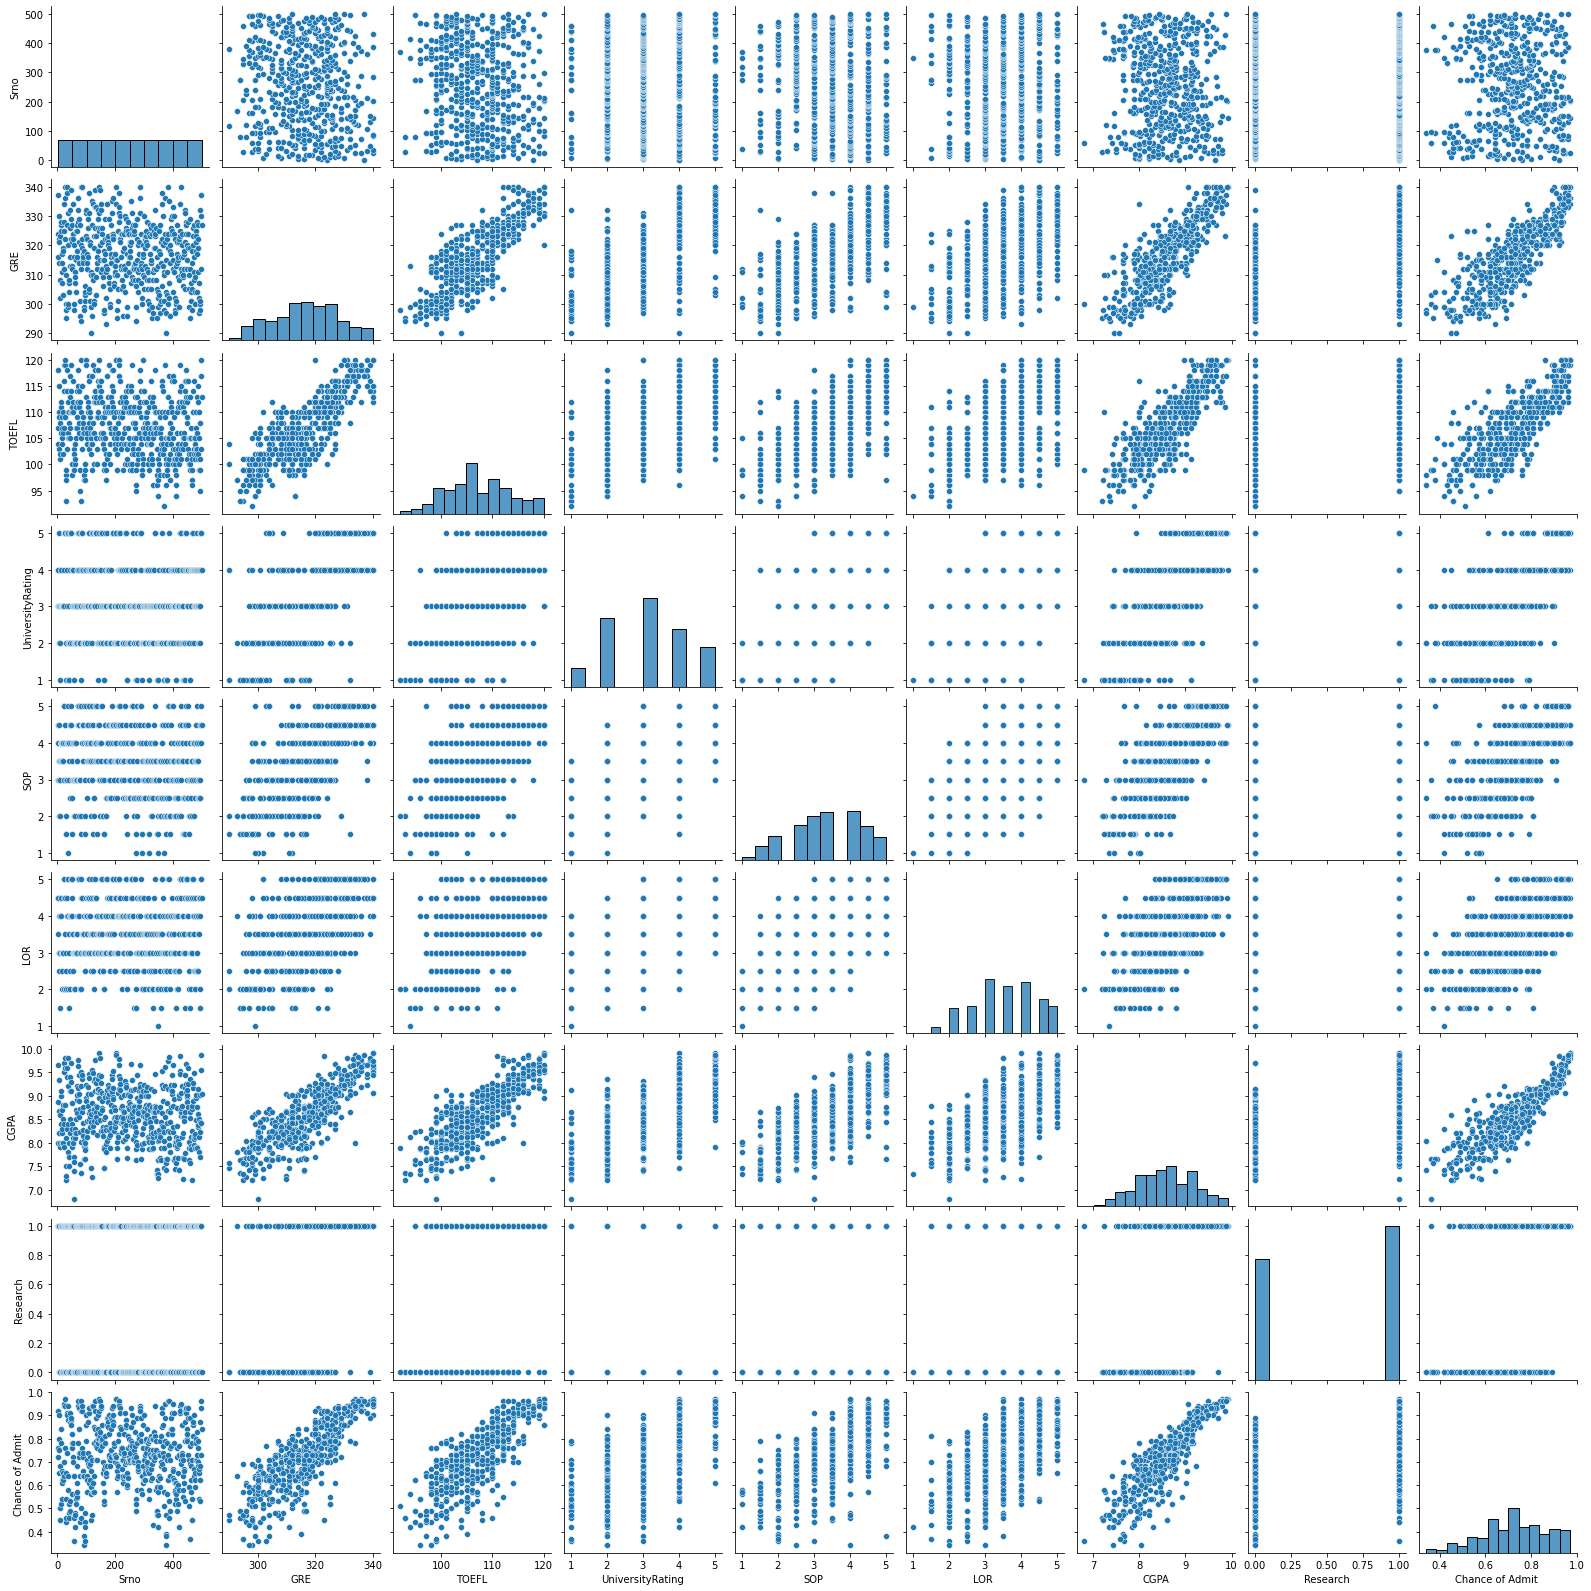

In [69]:
sns.pairplot(df)

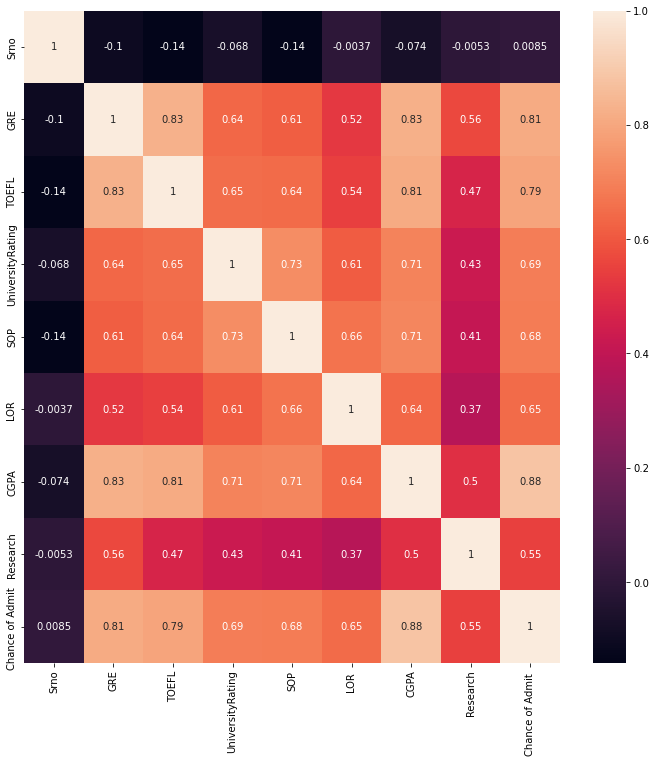

In [70]:
corr_matrix= df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [72]:
X = df.drop(columns = ['Chance of Admit '])
y=df['Chance of Admit ']

In [73]:
X=np.array(X)
y=np.array(y)

In [74]:
y= y.reshape(-1,1)
y.shape


(500, 1)

In [75]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
Scaler_X =StandardScaler()
X= Scaler_X.fit_transform(X)

Scaler_y =StandardScaler()
y= Scaler_y.fit_transform(y)

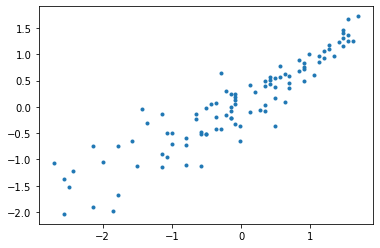

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.20)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
LinearRegression_model=LinearRegression()
LinearRegression_model.fit(X_train,y_train)
accuracy_LinearRegression=LinearRegression_model.score(X_test,y_test)
accuracy_LinearRegression
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test,y_predict,'.')

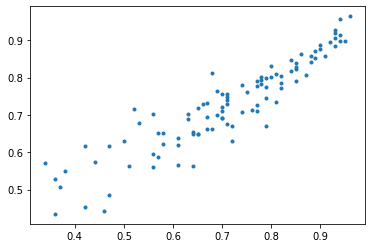

In [77]:
y_predict_orig=Scaler_y.inverse_transform(y_predict)
y_test_orig=Scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig,y_predict_orig,'.')

In [78]:
k=X_test.shape[1]
n=len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig,y_predict_orig)),'3f'))

MSE= mean_squared_error(y_test_orig,y_predict_orig)
MAE= mean_absolute_error(y_test_orig,y_predict_orig)
r2=r2_score(y_test_orig,y_predict_orig)
adj_r2= 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE=',RMSE,'\nMSE=',MSE,'\nMAE=',MAE, '\nr2=',r2,'\nadj_r2=',adj_r2)

RMSE= 0.068603 
MSE= 0.004706334112369361 
MAE= 0.04798108237419209 
r2= 0.80726366545832 
adj_r2= 0.7903198118722382


In [79]:
y_predict_orig

array([[0.64805575],
       [0.82866585],
       [0.71117359],
       [0.6773812 ],
       [0.79386697],
       [0.75512271],
       [0.77617126],
       [0.78314508],
       [0.58783963],
       [0.69234598],
       [0.96460412],
       [0.8621762 ],
       [0.62056948],
       [0.63811181],
       [0.65241819],
       [0.65336994],
       [0.76446676],
       [0.66245149],
       [0.6169555 ],
       [0.88820784],
       [0.77353003],
       [0.76228407],
       [0.91565476],
       [0.83104172],
       [0.80253445],
       [0.74867662],
       [0.67073978],
       [0.73376569],
       [0.75672883],
       [0.91851153],
       [0.85850634],
       [0.83809542],
       [0.68779749],
       [0.64807443],
       [0.89479204],
       [0.84250747],
       [0.70707043],
       [0.81198903],
       [0.66901486],
       [0.79777387],
       [0.85375042],
       [0.72205655],
       [0.56368734],
       [0.74090257],
       [0.69138971],
       [0.80817457],
       [0.80381019],
       [0.647